# Data Analysis
In the following Jupyter Notebook we will be performing data analysis on the VOC chromatographic data. We will be using hierarchical clustering to cluster the PCA data we created previously. This is a repetition of prelimiarly analysis performed by {cite:p}`fitzgerald2021`. This analysis ensures that the data is indeed clusterable and is predictable in nature.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Read in our datasets
pca_tsb = pd.read_csv('../data/cleaned/tsb_components.csv')
pca_bhi = pd.read_csv('../data/cleaned/bhi_components.csv')
pca_lb = pd.read_csv('../data/cleaned/lb_components.csv')
pca_full = pd.read_csv('../data/cleaned/full_components.csv')

We firstly define a clustering function which we will use to create a visualisation for each of our compounds.

In [3]:
def plot_clustering(X_red, labels, title=None):
    X_red, y = X_red.iloc[:,:2], X_red['Samples ']

    plt.figure(figsize=(8, 8))
    for i in range(X_red.shape[0]):
        plt.text(X_red.iloc[i, 0], X_red.iloc[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title, size=25)
    plt.xlim(-10,15)
    plt.ylim(-10,10)
    plt.xlabel('Principal Component 1', size=25)
    plt.ylabel('Principal Component 2', size=25)
    plt.hlines(0,xmin=-20, xmax=20, linestyles='dotted')
    plt.vlines(0,ymin=-20, ymax=20, linestyles='dotted')
    plt.grid()
    plt.savefig('../images/tsb_pca_cluster.png')

## TSB Cluster

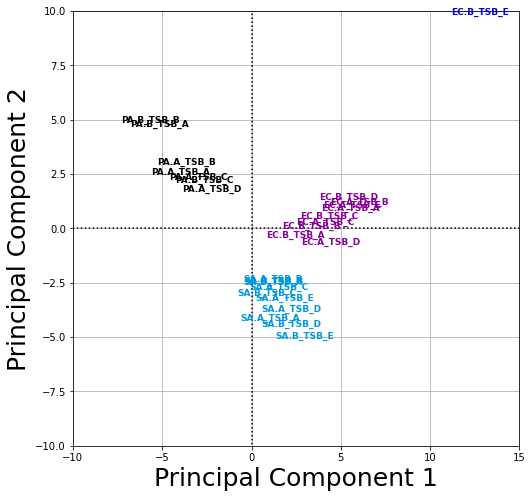

In [4]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=4)
clustering.fit(pca_tsb.iloc[:,:2])

plot_clustering(pca_tsb, clustering.labels_)

## BHI Cluster

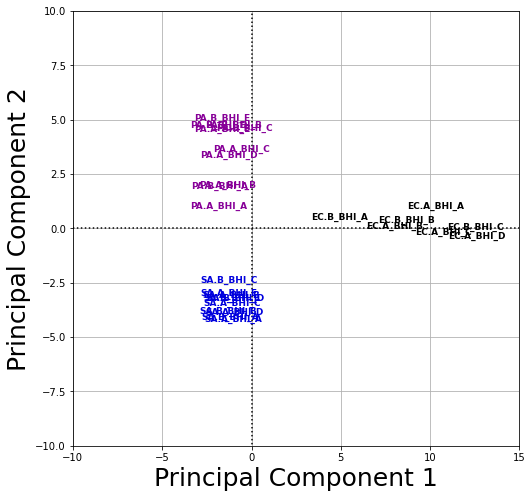

In [5]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustering.fit(pca_bhi.iloc[:,:2])

plot_clustering(pca_bhi, clustering.labels_)

## LB Cluster

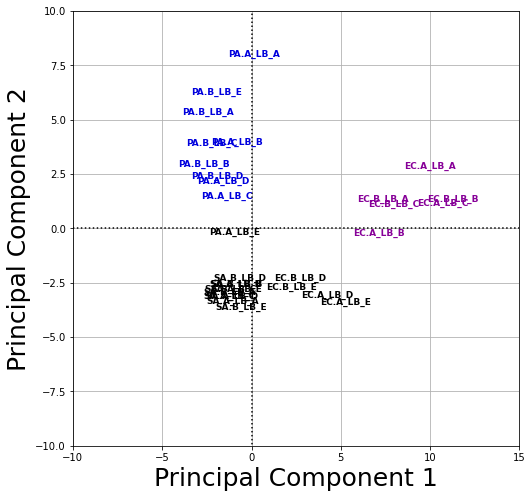

In [6]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustering.fit(pca_lb.iloc[:,:2])

plot_clustering(pca_lb, clustering.labels_)

## All Clustered

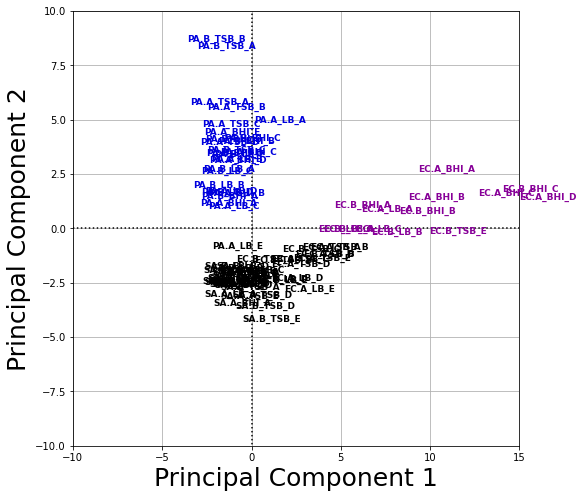

In [7]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustering.fit(pca_full.iloc[:,:2])

plot_clustering(pca_full, clustering.labels_)